In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

## 1a)

Errors for trapezoidal rule $\propto(\Delta x)^2$:

From the notes, we have that

$$\int_{x_i}^{x_{i+1}}fxdx\approx\dfrac{f_i+f_{i+1}}{2}\Delta x$$

Indeed, the leading term in ther Euler Maclaurin formula for the trapezoidal rule is:
$$\epsilon\approx\dfrac{1}{12}(\Delta x)^2[f'(a)-f'(b)]$$

The neglected higher order terms $(\Delta x)^2$ will make the errors scale with $(\Delta x)^2$


Errors for Simpson's rule $\propto(\Delta x)^4$:
$$\int_{x_{i-1}}^{x_{i+1}}f(x)dx\approx2f_i\Delta x+\dfrac{1}{2}\dfrac{d^2f}{dx^2}|_{x_i}\dfrac{2\Delta x^3}{3}$$
The neglected higher order terms $(\Delta x)^4$ will make the errors scale with $(\Delta x)^4$

Indeed, the leading term in ther Euler Maclaurin formula for simpson's rule is:
$$\epsilon\approx\dfrac{1}{180}(\Delta x)^4[f'''(a)-f'''(b)]$$

## 1b)

Prove that $\dfrac{I_1-I_2}{3}\approx\epsilon_1$.

$I_1 = I-\epsilon_1$, $I_2=I-\epsilon_2$

Trapezoid:
$$\dfrac{I_1-I_2}{3}=\dfrac{(I-\epsilon_1)-(I-\epsilon_2)}{3}$$
$$\dfrac{I_1-I_2}{3}=\dfrac{\epsilon_2-\epsilon_1}{3}$$
$$\dfrac{I_1-I_2}{3}\approx\dfrac{(2\Delta x)^2-(\Delta x)^2}{3}$$
$$\dfrac{I_1-I_2}{3}\approx\dfrac{3(\Delta x)^2}{3}$$
$$\dfrac{I_1-I_2}{3}\approx(\Delta x)^2$$
$$\dfrac{I_1-I_2}{3}\approx\epsilon_1$$

Simpson's rule:
$$\dfrac{I_1-I_2}{15}=\dfrac{(I-\epsilon_1)-(I-\epsilon_2)}{15}$$
$$\dfrac{I_1-I_2}{15}=\dfrac{\epsilon_2-\epsilon_1}{15}$$
$$\dfrac{I_1-I_2}{15}\approx\dfrac{(2\Delta x)^4-(\Delta x)^4}{15}$$
$$\dfrac{I_1-I_2}{15}\approx\dfrac{15(\Delta x)^2}{15}$$
$$\dfrac{I_1-I_2}{15}\approx(\Delta x)^2$$
$$\dfrac{I_1-I_2}{15}\approx\epsilon_1$$

## 1c)

We use the above formulas for error estimates to calculate the integration error for the following data:

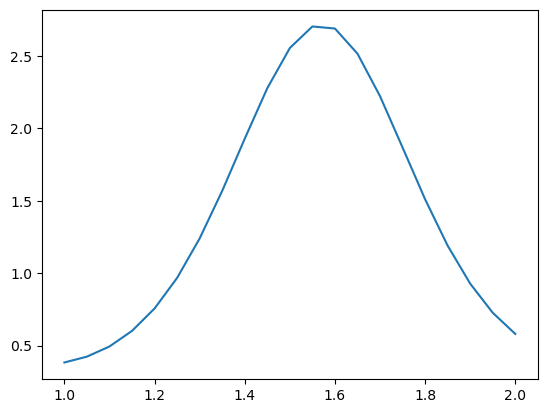

In [2]:
data = np.loadtxt('hw2_data.txt')
x = data.T[0]
f = data.T[1]
plt.plot(x,f)

In [3]:
#define step size
dx1 = 0.05
dx2 = 2*dx1
f1 = f
f2 = f[::2]

#Perform integration
I1_trapezoid = np.sum(f1[1:-1]*dx1) + 0.5*dx1*(f1[0]+f1[-1])    # trapzoidal rule: step size = delta x
I2_trapezoid = np.sum(f2[1:-1]*dx2) + 0.5*dx2*(f2[0]+f2[-1])    # trapzoidal rule: step size = 2 * delta x
I1_simpson = (np.sum(4*f1[1:-1:2]*dx1) + np.sum(2*f1[2:-1:2]*dx1) + f1[0]*dx1 + f1[-1]*dx1)/3.0  #simpson's rule: step size = delta x
I2_simpson = (np.sum(4*f2[1:-1:2]*dx2) + np.sum(2*f2[2:-1:2]*dx2) + f2[0]*dx2 + f2[-1]*dx2)/3.0  #simpson's rule: step size = 2 * delta x

error_est_trapezoid = (I1_trapezoid - I2_trapezoid)/3
error_est_simpson = (I1_simpson - I2_simpson)/15

print('I1_trapezoid',I1_trapezoid)
print('I1_simpson',I1_simpson)
print('Estimate for error in trapezoidal intergration with step size',dx1,'is', error_est_trapezoid)
print('Estimate for error in simpson intergration with step size',dx1,'is', error_est_simpson)
print('(Delta x)^2',dx1**2)
print('(Delta x)^4',dx1**4)

I1_trapezoid 1.482354729260015
I1_simpson 1.4829705173600622
Estimate for error in trapezoidal intergration with step size 0.05 is 0.0006157881000476984
Estimate for error in simpson intergration with step size 0.05 is 4.3799084543512855e-06
(Delta x)^2 0.0025000000000000005
(Delta x)^4 6.250000000000001e-06


The error estimates for the trapezoidal and simpson integration do not quite match the $(\Delta x)^2$ and $(\Delta x)^4$ scaling that we expect. However they are roughly on the same order of magnitude

In [4]:
I = 1.482974344768713 # actual integral value
error_trapezoid = I - I1_trapezoid # actual error in trapezoidal integration procedure
error_simpson = I - I1_simpson # actual error in simpson integration procedure

print('Trapezoidal integration with dx = ', dx1,':')
print(' - True error', error_trapezoid)
print(' - Fractional error in error estimate', (error_trapezoid-error_est_trapezoid)/error_trapezoid)
print('')
print('Simpson integration with dx = ', dx1,':')
print(' - True error', error_simpson)
print(' - Fractional error in error estimate', (error_simpson-error_est_simpson)/error_simpson)

Trapezoidal integration with dx =  0.05 :
 - True error 0.0006196155086979349
 - Fractional error in error estimate 0.006177070451770181

Simpson integration with dx =  0.05 :
 - True error 3.827408650680653e-06
 - Fractional error in error estimate -0.14435349190434063


We see that our estimate for the error as calculated in part a) is reasonable, with a relatively low fractional error.

## 2a) 
Numerically evaluate the integral for different values of $\mu/k_BT$

$$N=V\int_0^{\infty}\dfrac{8\pi p^2dp}{\hbar^3}\dfrac{1}{1+e^{(\epsilon-\mu)/k_B T}}$$

We simplify by subbing $x=\epsilon/k_B T$, $p=\sqrt{2m\epsilon}$ and $n_Q=(\dfrac{mk_BT}{2\pi\hbar^2})^{3/2}$ to get:

$$\dfrac{N}{n_QV}=32\pi^{5/2}\int_0^{\infty}\dfrac{\sqrt{x}}{1+e^{x-\mu/k_BT}}dx$$

We will use this to define a function that accepts $\mu/k_BT$ to return $\dfrac{N}{n_QV}$ 

/var/folders/0d/bnhsvccn51g8l25lggns64_h0000gn/T/ipykernel_3119/3590786340.py:2: RuntimeWarning: overflow encountered in exp
  func = lambda x, ukT: 32 * np.pi**(5/2) * (np.sqrt(x))/(1+np.exp(x-ukT))


Text(0.5, 0, '$\\dfrac{\\mu}{k_B T}$')

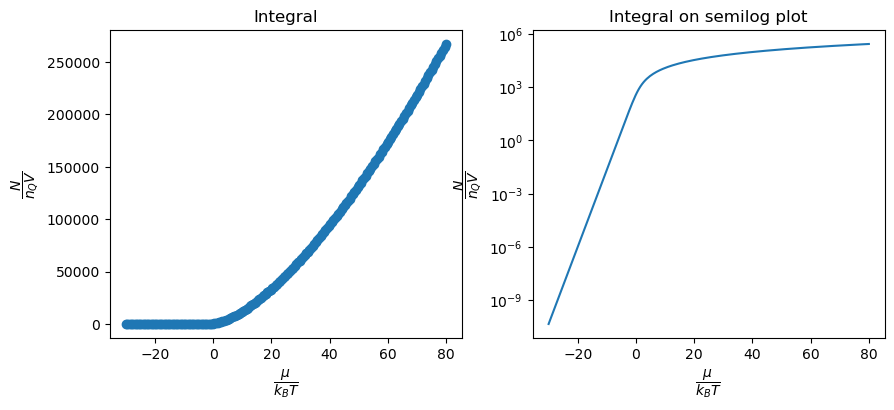

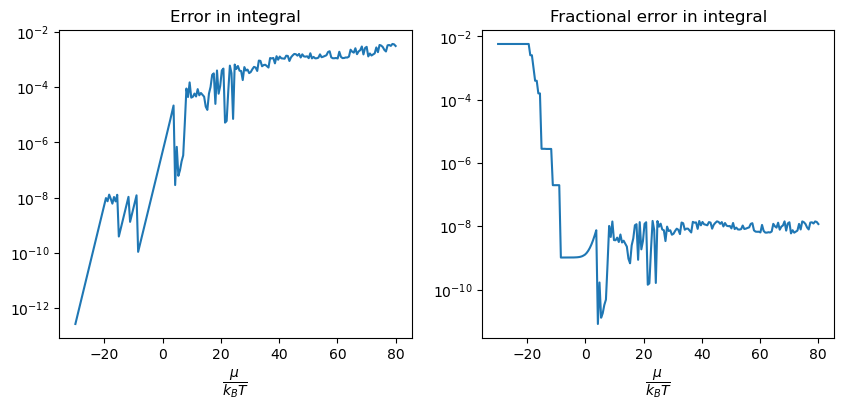

In [6]:
# Function to integrate
func = lambda x, ukT: 32 * np.pi**(5/2) * (np.sqrt(x))/(1+np.exp(x-ukT))

# Generate array of ukT values
ukT = np.linspace(-30,80,200)

# Return N/nQV as a function of u/kT by performing the integral
def Get_NnQV(ukT):
    I = np.empty(shape=len(ukT))
    err = np.empty(shape=len(ukT))
    for i in range(len(ukT)):
        I[i], err[i] = scipy.integrate.quad(func, 0 , np.inf, args=(ukT[i],))
    return I, err

I, err = Get_NnQV(ukT)

fig1, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 4))
ax1.set_title('Integral')
ax1.scatter(ukT, I)
ax1.set_xlabel('$\dfrac{\mu}{k_B T}$')
ax1.set_ylabel('$\dfrac{N}{n_Q V}$')
ax2.set_title('Integral on semilog plot')
ax2.semilogy(ukT, I)
ax2.set_xlabel('$\dfrac{\mu}{k_B T}$')
ax2.set_ylabel('$\dfrac{N}{n_Q V}$')

fig2, (ax3, ax4) = plt.subplots(1, 2,figsize=(10, 4))
ax3.set_title('Error in integral')
ax3.semilogy(ukT, err)
ax3.set_xlabel('$\dfrac{\mu}{k_B T}$')
ax4.set_title('Fractional error in integral')
ax4.semilogy(ukT, err/I)
ax4.set_xlabel('$\dfrac{\mu}{k_B T}$')



Now we set up an interpolating function that returns $\mu/k_B T$ as a function of $\dfrac{N}{n_Q V}$


/var/folders/0d/bnhsvccn51g8l25lggns64_h0000gn/T/ipykernel_3119/3590786340.py:2: RuntimeWarning: overflow encountered in exp
  func = lambda x, ukT: 32 * np.pi**(5/2) * (np.sqrt(x))/(1+np.exp(x-ukT))


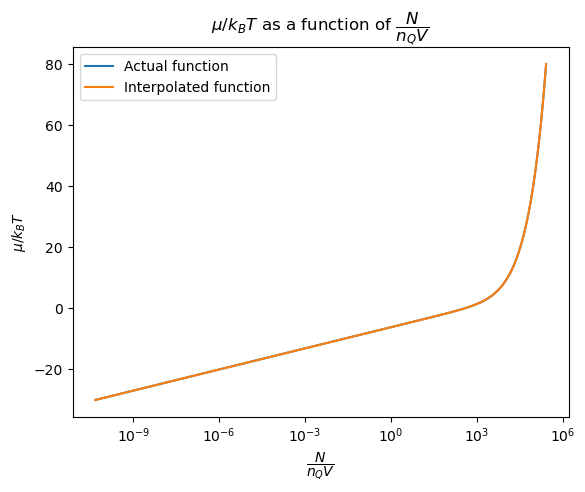

In [7]:
# Define sample points for interpolation
ukT_sample = np.linspace(-30,80,200)
NnQV_sample, err_sample = Get_NnQV(ukT_sample)

# Set up an interpolating function (cubic spline) that returns u/kT as a function of N/nQV
Get_ukT_spline = scipy.interpolate.CubicSpline(NnQV_sample,ukT_sample)

# Establish high resolution range of u/kT values
ukT_plotting = np.linspace(-30,80,300) 

# Get corresponding N/nQV values
NnQV_plotting, err_plotting = Get_NnQV(ukT_plotting)

# Apply spline coefficients to high resolution N/nQV values
ukT_interpolated = Get_ukT_spline(NnQV_plotting)

plt.title('$\mu/k_B T$ as a function of $\dfrac{N}{n_QV}$')
plt.semilogx(I,ukT,label='Actual function')
plt.semilogx(NnQV_plotting,ukT_interpolated,label='Interpolated function')
plt.xlabel('$\dfrac{N}{n_QV}$')
plt.ylabel('$\mu/k_B T$')
plt.legend()


The interpolation is successful

## 2b)

Assess the errors in your calculation: describe the sources of error and estimate the accuracy of your final value of 
$\mu(N,T)$

For $N$ sample points, the error in a cubic spline decreases as $N^4$. We will demonstrate this by plotting the error in the interpolation for different numbers of sample points.  

/var/folders/0d/bnhsvccn51g8l25lggns64_h0000gn/T/ipykernel_1821/1117660148.py:2: RuntimeWarning: overflow encountered in exp
  func = lambda x, ukT: 32 * np.pi**(5/2) * (np.sqrt(x))/(1+np.exp(x-ukT))


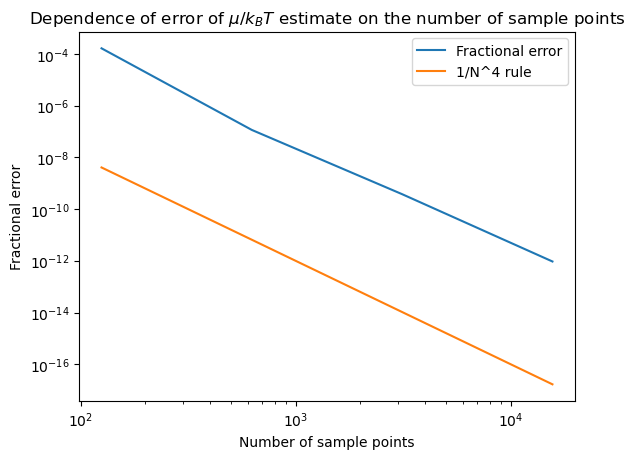

In [151]:
# Define high resolution array of u/kT values. 
ukT_plotting = np.linspace(-48,48,300)

# Retrieve corresponding values of N/nQV (neglecting integration error)
NnQV_plotting, err = Get_NnQV(ukT_plotting)

# Define a range of sample point quantities
num_sample_pts = 5**np.arange(3.,7.,1)

# Prepare an array for collecting fractional error corresponding to each number of sample points
frac_error = np.empty(len(num_sample_pts))

for i in range(len(num_sample_pts)):
    
    # Define an array of sample points for u/kT
    ukT_sample = np.linspace(-50,50,int(num_sample_pts[i]))
    
    # Get corresponding N/nQV sample points
    NnQV_sample, err = Get_NnQV(ukT_sample)
    
    # Perform interpolation using sample points (cubic spline)
    Get_ukT_spline = scipy.interpolate.CubicSpline(NnQV_sample,ukT_sample)
    
    # Apply spline to high resolution array of N/nQV to get high resolution u/kT estimate
    ukT_interpolated = Get_ukT_spline(NnQV_plotting)
    
    # Calculate error between interpolated u/kT and actual u/kT
    frac_error[i] = np.mean(np.abs((ukT_interpolated-ukT_plotting)/ukT_plotting))
    
plt.title('Dependence of error of $\mu/k_B T$ estimate on the number of sample points')
plt.xlabel('Number of sample points')
plt.ylabel('Fractional error')
plt.loglog(num_sample_pts,frac_error,label='Fractional error')
plt.loglog(num_sample_pts,num_sample_pts**(-4),label='1/N^4 rule')
plt.legend()

We have errors coming from the cubic spline interpolation that decrease with $N^4$ where $N$ is the number of sample points.

## 2c
Writing the analytic limits in a form that is $\mu(\dfrac{N}{n_QV})$ for easy comparison with our results we get:

non degenerate: $$\mu = k_B T\ln(\dfrac{1}{2}\dfrac{N}{n_QV})$$
$$\dfrac{\mu_{non-degen}}{k_BT} = \ln(\dfrac{1}{2}\dfrac{N}{n_QV})$$
degenerate: $$\mu = \dfrac{\hbar^2(3\pi^2\dfrac{N}{n_QV}n_Q)^{2/3}}{2m}=\dfrac{3^{2/3}\pi^{1/3}}{4}k_BT(\dfrac{N}{n_QV})^{2/3}$$
$$\dfrac{\mu_{degen}}{k_BT} = \dfrac{3^{2/3}\pi^{1/3}}{4}(\dfrac{N}{n_QV})^{2/3}$$

From part a) we got $\mu_{interpolated}/k_BT$ (variable called ukT_interpolated) as a function of $\dfrac{N}{n_QV}$ (variable called NnQV_plotting). 

$$\dfrac{\mu_{interpolated}}{k_BT} = {spline}(\dfrac{N}{n_QV})$$


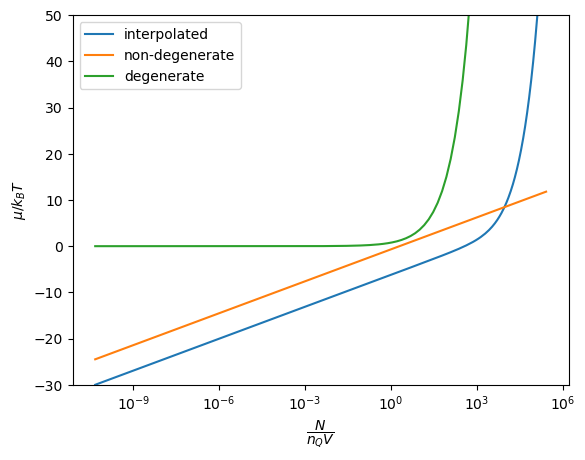

In [17]:
ukT_non_degen = np.log(1/2 * NnQV_plotting)
ukT_degen = 3**(2/3) * np.pi**(1/3) * 1/4 * NnQV_plotting**(2/3)

plt.ylabel('$\mu/k_BT$')
plt.xlabel('$\dfrac{N}{n_QV}$')
plt.semilogx(NnQV_plotting,ukT_interpolated,label='interpolated')
plt.semilogx(NnQV_plotting,ukT_non_degen,label='non-degenerate')
plt.semilogx(NnQV_plotting,ukT_degen,label='degenerate')
plt.ylim(-30,50)
plt.legend()

Technically, there are no regions of parameter space where the limits are accurate to 1% for my plot but it seems that I am only off by some constant because they follow the shape of my results exactly. If I were not off by some constant, then it would seem that for $\mu/k_BT<0$ and $\dfrac{N}{n_QV}<10^2$ we are in the non-degenerate limit and outside of that we are in the degenerate limit

## 3a) 3D Maxwell Boltzmann
This system is isotropic so we will focus only on the speed distribution
$$f({v})=(\dfrac{m}{2\pi k_BT})^{3/2}4\pi v^2e^{-\frac{1}{2}\frac{m{v}^2}{k_BT}}$$

In [35]:
seed = 5885
rng = np.random.default_rng(seed)

k_B = 1.380649 * 10**(-23)
T = 300
m = 1.660538921 * 10**(-24)
def f(v):
    return (m / (2 * np.pi * k_B * T))**(3/2) * 4 * np.pi * v**2 * np.exp(- m * v**2 / (2* k_B * T))


def MaxwellBoltzmann(N):
    #Define boundaries of rectangle from which we will uniformly sample 4*N points
    #v boundaries
    vmin = 0
    vmax = 300
    
    #p boundaries (upper boundary will be maximum of theoretical MB distribution)
    v_plotting = np.linspace(vmin,vmax,N*6)
    pmax = np.max(f(v_plotting))*1.5
    v_sample = np.random.default_rng().uniform(vmin,vmax,N*6)
    p_sample = np.random.default_rng().uniform(0,pmax,N*6)
    
    # Keep
    ind = np.asarray(np.where(p_sample <= f(v_sample)))

    # Reject
    ind2 = np.where(p_sample > f(v_sample))
    
    # Of the accepted points, we only want N
    ind_N = ind.T[:N]
    print('Here are', np.shape(ind_N), 'velocities sampled from a Maxwell Boltzmann distribution')
    
    return v_sample[ind_N]

v_dist = MaxwellBoltzmann(10**6)

Here are (1000000, 1) velocities sampled from a Maxwell Boltzmann distribution


In my algorithm, I use the rejection method. I first sample points from a uniform distribution in a rectangle that encompasses the area of interest for the theoretical Maxwell Boltzmann distribution. The size of the rectangle has an area about 6 times greater that of the curve so I sample 6 times as many points that I desire and hopefully, a quarter of them land beneath the Maxwell Boltzmann distribution. I then select the first $N$ points that survived the rejection method 

## 3b)

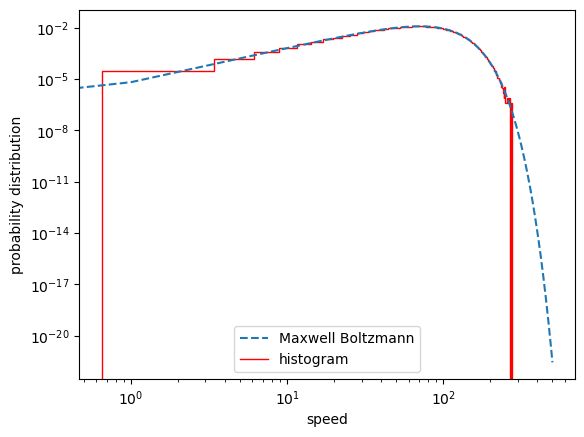

In [34]:
plt.plot(v,f(v),linestyle='dashed',label='Maxwell Boltzmann')
counts, bins = np.histogram(v_dist,bins = 100, density='True')
plt.stairs(counts, bins,color='red',label='histogram')
plt.xlabel('speed')
plt.ylabel('probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.legend()

## 3c)

Compare the average velocity from my sampling function to the theoretical average velocity.

In [54]:
# theoretical average velocity
avg_v_theoretical = np.sqrt(8*k_B*T/(np.pi*m))

# find error in average velocity using 10**0 all the way to 10**6 samples
s = 8
num_samples = np.empty(s)
error = np.empty(s)
for i in range(s):
    N = 10**i
    num_samples[i] = N   
    # Get speed distribution with N points
    v_dist = MaxwellBoltzmann(N)
    
    # find average of speed distribution
    avg_v_histo = np.mean(v_dist)
    
    # calculate fractional error
    error[i] = np.abs(avg_v_histo-avg_v_theoretical)/avg_v_theoretical

Here are (1, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (10, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (100, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (1000, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (10000, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (100000, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (1000000, 1) velocities sampled from a Maxwell Boltzmann distribution
Here are (10000000, 1) velocities sampled from a Maxwell Boltzmann distribution


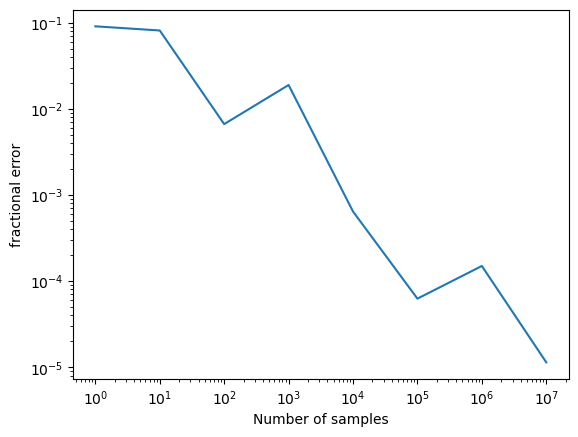

In [55]:
plt.ylabel('fractional error')
plt.xlabel('Number of samples')
plt.loglog(num_samples,error)

As the number of steps increase, the general trend is that the fractional error decreases.